# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.



In [3]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [4]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  


2. Remova as variáveis não significantes.  


In [5]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + time + net_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [6]:
modelo_a = sm.OLS(y,X).fit()

modelo_a.summary()

C:\Users\Belit\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                 -0.067
Method:                 Least Squares   F-statistic:                    0.8752
Date:                Sat, 11 Nov 2023   Prob (F-statistic):              0.533
Time:                        16:23:57   Log-Likelihood:                 9.5446
No. Observations:                   5   AIC:                            -13.09
Df Residuals:                       2   BIC:                            -14.26
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0526      0.033      1.577      0.255      -0.091       0.196
sex[T.Female]     -0.0720      0.055     -1.314      0.319      -0.308       0.164
smoker[T.No]       0.0526      0.033      1.577      0.255      -0.091       0.196
time[T.Dinner]     0.0526      0.033      1.577      0.255      -0.091       0.196
net_bill           0.0017      0.006      0.284      0.803      -0.024       0.028
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.026
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.389
Skew:                          -0.087   Prob(JB):                        0.823
Kurtosis:                       1.644   Cond. No.                     5.37e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.22e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

3. observe o gráfico de resíduos em função de ```net_bill```  


In [7]:
modelo_b = smf.ols('tip ~ net_bill + 1', tips).fit()

modelo_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           5.02e-23
Time:                        16:27:55   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

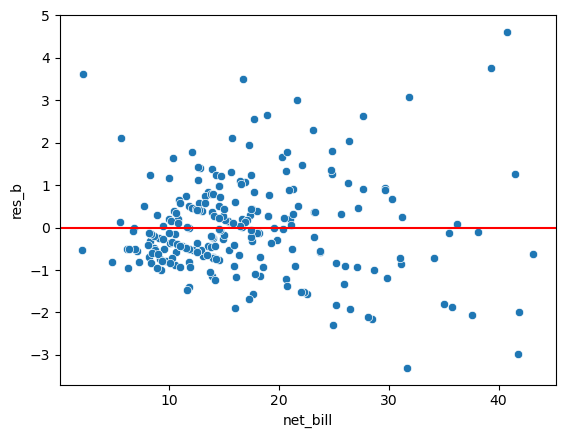

In [8]:
tips['res_b'] = modelo_b.resid

sns.scatterplot(x = 'net_bill', y = 'res_b', data = tips)
plt.axhline(y=0, color='r', linestyle='-')

4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [9]:
modelo_c = smf.ols('tip ~ np.log(net_bill) + 1', tips).fit()

modelo_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           4.40e-20
Time:                        16:30:03   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

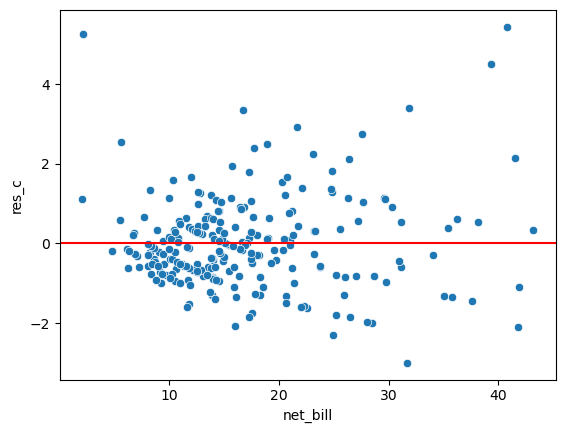

In [10]:
tips['res_c'] = modelo_c.resid

sns.scatterplot(x = 'net_bill', y = 'res_c', data = tips)
plt.axhline(y=0, color='r', linestyle='-')

In [11]:
modelo_d = smf.ols('tip ~ net_bill + I(net_bill**2) + 1', tips).fit()

modelo_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           4.96e-22
Time:                        16:30:30   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0743      0.353      3.039      0.003       0.378       1.770
net_bill             0.1288      0.037      3.493      0.001       0.056       0.202
I(net_bill ** 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

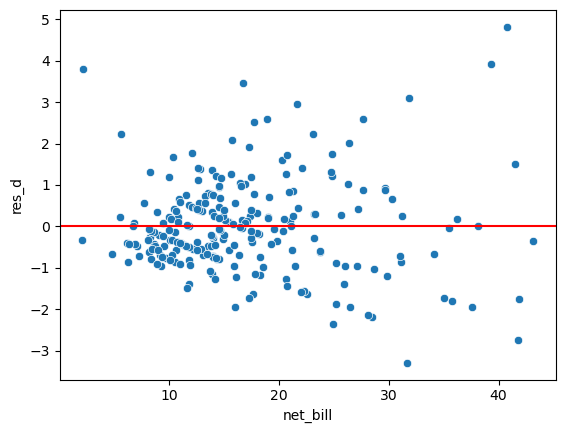

In [12]:
tips['res_d'] = modelo_d.resid

sns.scatterplot(x = 'net_bill', y = 'res_d', data = tips)
plt.axhline(y=0, color='r', linestyle='-')

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.


2. Remova as variáveis não significantes.


In [13]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + time + net_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [14]:
modelo_e = sm.OLS(y,X).fit()

modelo_e.summary()

C:\Users\Belit\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                 -0.067
Method:                 Least Squares   F-statistic:                    0.8752
Date:                Sat, 11 Nov 2023   Prob (F-statistic):              0.533
Time:                        16:35:40   Log-Likelihood:                 9.5446
No. Observations:                   5   AIC:                            -13.09
Df Residuals:                       2   BIC:                            -14.26
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0526      0.033      1.577      0.255      -0.091       0.196
sex[T.Female]     -0.0720      0.055     -1.314      0.319      -0.308       0.164
smoker[T.No]       0.0526      0.033      1.577      0.255      -0.091       0.196
time[T.Dinner]     0.0526      0.033      1.577      0.255      -0.091       0.196
net_bill           0.0017      0.006      0.284      0.803      -0.024       0.028
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.026
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.389
Skew:                          -0.087   Prob(JB):                        0.823
Kurtosis:                       1.644   Cond. No.                     5.37e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.22e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

3. Observe o gráfico de resíduos em função de ```net_bill```


In [15]:
modelo_f = smf.ols('np.log(tip) ~ net_bill + 1', tips).fit()

modelo_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           2.60e-21
Time:                        16:37:56   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

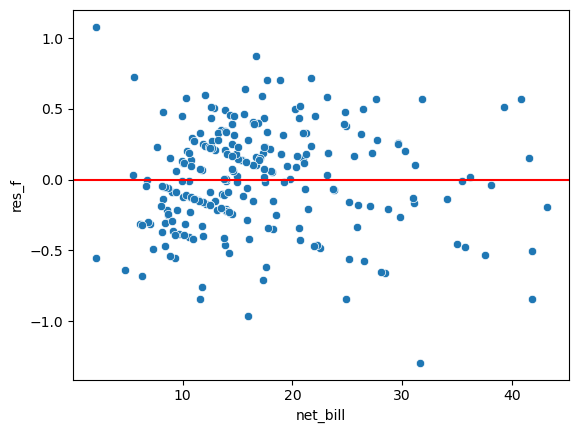

In [16]:
tips['res_f'] = modelo_f.resid

sns.scatterplot(x = 'net_bill', y = 'res_f', data = tips)
plt.axhline(y=0, color='r', linestyle='-')

4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.


In [17]:
modelo_g = smf.ols('np.log(tip) ~ np.log(net_bill) + 1', tips).fit()

modelo_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           5.62e-22
Time:                        16:39:04   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

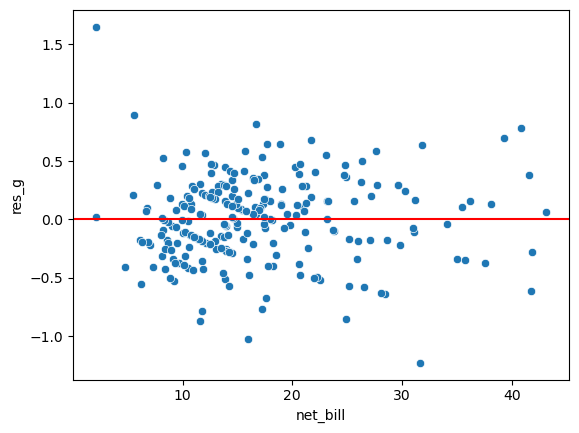

In [18]:
tips['res_g'] = modelo_g.resid

sns.scatterplot(x = 'net_bill', y = 'res_g', data = tips)
plt.axhline(y=0, color='r', linestyle='-')

5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [19]:
modelo_h = smf.ols('np.log(tip) ~ net_bill + I(net_bill**2) + 1', tips).fit()

modelo_h.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           2.82e-22
Time:                        16:40:06   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill             0.0655      0.012      5.642      0.000       0.043       0.088
I(net_bill ** 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

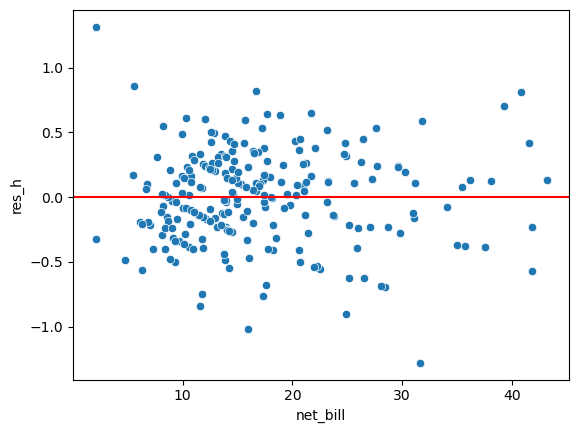

In [20]:
tips['res_h'] = modelo_h.resid

sns.scatterplot(x = 'net_bill', y = 'res_h', data = tips)
plt.axhline(y=0, color='r', linestyle='-')

In [21]:
tips['pred_h'] = modelo_h.fittedvalues

r = tips[['pred_h', 'tip']].corr().iloc[0,1]

r**2

0.3197192113607721

# Resposta:

- A melhor escolha seria o modelo que utiliza o polinômio de segundo grau, possui um R² de 0,338.


- O modelo que possui o melhor R² são os exercicios 1 e 2 da regressão linear de 0,333 > 0,319.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.


2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?


3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.


4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros


5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [24]:
renda_raw = pd.read_csv('previsao_de_renda (1).csv')
renda_raw.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [26]:
renda_a = renda_raw.dropna()

In [27]:
renda_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [28]:
modelo_j = smf.ols('renda ~ tempo_emprego + 1', renda_a).fit()

modelo_j.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:48:11   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Belit\AppData\Local\Temp\ipykernel_7780\3230484638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda_a['res_j'] = modelo_j.resid


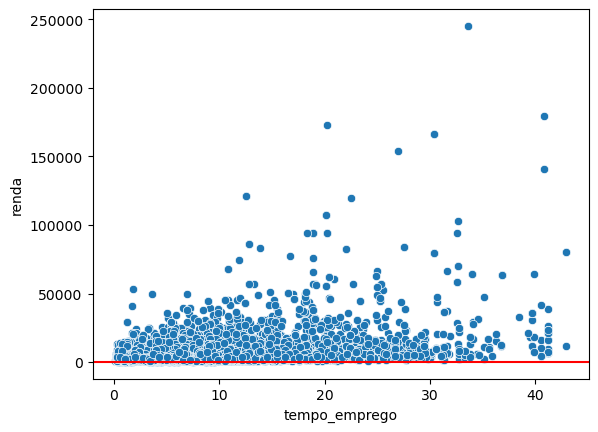

In [30]:
renda_a['res_j'] = modelo_j.resid

sns.scatterplot(x = 'tempo_emprego', y = 'renda', data = renda_a)
plt.axhline(y=0, color='r', linestyle='-')

In [31]:
modelo_l = smf.ols('renda ~ tempo_emprego + I(tempo_emprego**2) + 1', renda_a).fit()

modelo_l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1116.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:53:49   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12424   BIC:                         2.592e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2965.3374    151.248     19.606      0.000    2668.868    3261.807
tempo_emprego           303.4316     28.838     10.522      0.000     246.904     359.959
I(tempo_emprego ** 2)     7.7182      0.997      7.742      0.000       5.764       9.672
==============================================================================
Omnibus:                    16830.800   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7213674.372
Skew:                           7.558   Prob(JB):                         0.00
Kurtosis:                     120.060   Cond. No.                         460.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
modelo_m = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia + 1', renda_a).fit()

modelo_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     63.21
Date:                Sat, 11 Nov 2023   Prob (F-statistic):          9.26e-277
Time:                        16:54:01   Log-Likelihood:            -1.2994e+05
No. Observations:               12427   AIC:                         2.599e+05
Df Residuals:                   12403   BIC:                         2.601e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -6427.9480   2742.627     -2.344      0.019   -1.18e+04   -1051.973
sexo[T.M]                         5407.9050    170.391     31.738      0.000    5073.912    5741.899
posse_de_veiculo[T.True]           -37.3630    164.945     -0.227      0.821    -360.680     285.954
posse_de_imovel[T.True]            168.1904    163.087      1.031      0.302    -151.486     487.867
tipo_renda[T.Bolsista]           -1228.3424   2813.543     -0.437      0.662   -6743.324    4286.639
tipo_renda[T.Empresário]           215.6030    173.721      1.241      0.215    -124.918     556.124
tipo_renda[T.Pensionista]        -2581.9114   2814.264     -0.917      0.359   -8098.307    2934.484
tipo_renda[T.Servidor público]    1459.5886    257.630      5.665      0.000     954.594    1964.583
educacao[T.Pós graduação]         -701.9793   1853.901     -0.379      0.705   -4335.913    2931.954
educacao[T.Secundário]             771.0477    839.928      0.918      0.359    -875.341    2417.436
educacao[T.Superior completo]     1474.2434    843.075      1.749      0.080    -178.314    3126.800
educacao[T.Superior incompleto]    612.7776    907.261      0.675      0.499   -1165.594    2391.150
estado_civil[T.Separado]           840.3138   1297.662      0.648      0.517   -1703.306    3383.934
estado_civil[T.Solteiro]           874.2028   1270.517      0.688      0.491   -1616.208    3364.613
estado_civil[T.União]             -383.3703    293.671     -1.305      0.192    -959.011     192.270
estado_civil[T.Viúvo]               73.9033   1348.441      0.055      0.956   -2569.251    2717.057
tipo_residencia[T.Casa]            441.0209    631.452      0.698      0.485    -796.724    1678.766
tipo_residencia[T.Com os pais]     -64.1206    704.048     -0.091      0.927   -1444.165    1315.923
tipo_residencia[T.Comunitário]   -1298.7546   1229.042     -1.057      0.291   -3707.867    1110.358
tipo_residencia[T.Estúdio]        1395.6437   1158.247      1.205      0.228    -874.700    3665.988
tipo_residencia[T.Governamental]   744.0167    769.607      0.967      0.334    -764.532    2252.566
qtd_filhos                        -701.0182   1259.195     -0.557      0.578   -3169.235    1767.199
idade                              167.2738      8.934     18.724      0.000     149.762     184.786
qt_pessoas_residencia              983.3920   1256.967      0.782      0.434   -1480.458    3447.242
==============================================================================
Omnibus:                    17462.944   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8391951.307
Skew:                           8.097   Prob(JB):                         0.00
Kurtosis:                     129.273   

In [33]:
modelo_n = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + tipo_renda + idade + 1', renda_a).fit()

modelo_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     175.7
Date:                Sat, 11 Nov 2023   Prob (F-statistic):          3.54e-282
Time:                        16:54:17   Log-Likelihood:            -1.2996e+05
No. Observations:               12427   AIC:                         2.599e+05
Df Residuals:                   12418   BIC:                         2.600e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -2741.7145    375.077     -7.310      0.000   -3476.924   -2006.505
sexo[T.M]                       5406.1999    168.641     32.057      0.000    5075.638    5736.762
posse_de_veiculo[T.True]          65.4224    163.014      0.401      0.688    -254.110     384.955
posse_de_imovel[T.True]          220.9034    159.764      1.383      0.167     -92.258     534.065
tipo_renda[T.Bolsista]          -679.4033   2813.617     -0.241      0.809   -6194.529    4835.722
tipo_renda[T.Empresário]         268.4224    172.397      1.557      0.119     -69.502     606.347
tipo_renda[T.Pensionista]      -2156.0471   2811.895     -0.767      0.443   -7667.798    3355.703
tipo_renda[T.Servidor público]  1601.8053    256.119      6.254      0.000    1099.773    2103.838
idade                            159.3162      8.209     19.407      0.000     143.225     175.407
==============================================================================
Omnibus:                    17436.902   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8293470.790
Skew:                           8.077   Prob(JB):                         0.00
Kurtosis:                     128.523   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

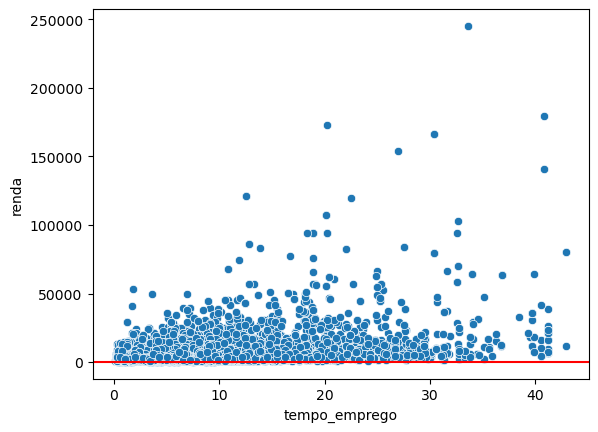

In [36]:
tips['res_n'] = modelo_n.resid

sns.scatterplot(x = 'tempo_emprego', y = 'renda', data = renda_a)
plt.axhline(y=0, color='r', linestyle='-')

# Resposta:

- Verificamos que temos um grande número de dados outliers, utilizando os outros parâmetros na regressão, conseguimos analisar que é possivel amenizar os efeitos desses dados, porém, não muito impactante. O ajuste nos retornou um R² baixo, e com isso, para fechar a conclusão que a variável com o maior impacto nessa análise é a 'tempo_emprego'